In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./nndb_flat.csv')
data.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [3]:
X = data.iloc[0:, 7:45]
X

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [4]:
X = pd.DataFrame(X).to_numpy()

In [5]:
mean_mtrx = np.mean(X, axis=0)

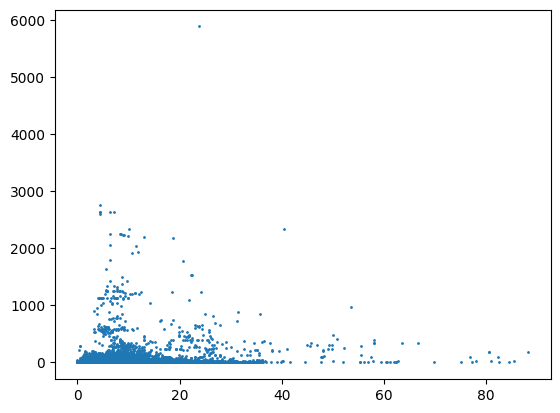

In [6]:
plt.plot(X[:, 1], X[:, 11], 'o', ms=1)

In [7]:
# Make the mean of each column zero
X -= mean_mtrx

# Standard deviation of the columns
std_dev = np.std(X, axis=0)

# Finding the matrix Z
Z = np.divide(X, std_dev)

# Transpose Z
Z_T = np.transpose(Z)

# Finding covariance matrix of Z
cov_Z = np.matmul(Z_T, Z)

In [8]:
# Calculating eigenvalues and eigenvectors of cov_Z
# w, v = np.linalg.eig(cov_Z)

w = np.load('./eigenvalues.npy')
v = np.load('./eigenvectors.npy')

In [9]:
# np.save('eigenvalues', w)
# np.save('eigenvectors', v)

In [10]:
### Load real values of eigenvalues and eigenvectors
# w_real, v_real = np.linalg.eigh(cov_Z)
# np.save('eigenvaues_real', w_real)
# np.save('eigenvectors_real', v_real)

w_real = np.load('eigenvaues_real.npy')
v_real = np.load('eigenvectors_real.npy')

In [11]:
# Sorting the eigenvalues in decreasing order
idx = w_real.argsort()[::-1]
w_real_rearranged = w_real[idx]
P_star = v_real[:, idx]

In [12]:
# Calculating Z_star
Z_star = np.matmul(Z, P_star)

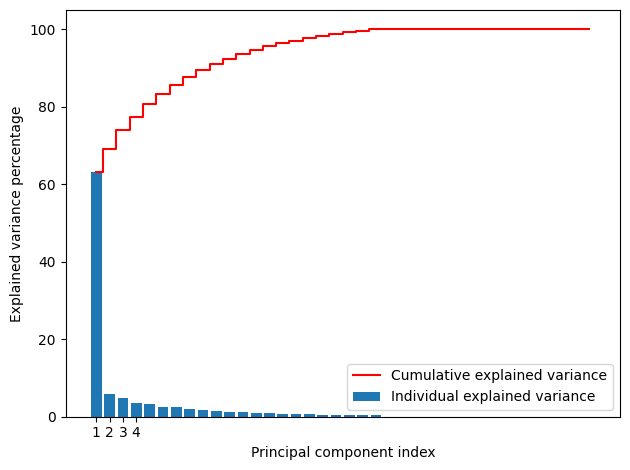

In [13]:
exp_var = []

for i in w_real_rearranged:
  var = (i / np.sum(w_real_rearranged)) * 100
  exp_var.append(var)

cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 39), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 39), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4])
plt.legend(loc='best')
plt.tight_layout()

plt.savefig("Barplot.png")

In [15]:
w_real

array([-3.11052384e-11, -2.48912983e-11, -2.11853424e-11, -1.57273233e-11,
       -1.01185378e-11, -9.22772387e-12, -6.22769055e-12, -4.69180148e-12,
        2.04179705e-12,  1.15288128e-11,  1.16551052e-11,  1.58148924e-11,
        2.04447813e-11,  2.91124507e-11,  3.80815561e-11,  3.30892038e+01,
        2.31557506e+03,  2.76039220e+03,  3.55111375e+03,  3.60609664e+03,
        3.80778675e+03,  4.65439688e+03,  4.95352049e+03,  5.61872843e+03,
        6.76206961e+03,  7.57447181e+03,  7.90046390e+03,  9.16756044e+03,
        1.14220428e+04,  1.28019032e+04,  1.50132569e+04,  1.71141867e+04,
        1.80753984e+04,  2.29802697e+04,  2.53911320e+04,  3.49085053e+04,
        4.07967140e+04,  4.49869731e+05])

In [26]:
# np.dot(np.std(Z, axis=0), Z)
# np.array([np.std(Z, axis=0)])
np.shape(Z)

(8618, 38)

In [27]:
np.shape(np.array([np.std(Z, axis=0)]))

(1, 38)

In [30]:
a=np.matmul(np.array([np.std(Z, axis=0)]), Z_T)

In [33]:
np.shape(Z)

(8618, 38)